# Compare Previous Violation Interactions Experiment

**Goal**: Run a model comparison of a multi-class model with only previous violation history versus previous violation history + interactions terms between previous violation history and sa, sb stimuli terms.

In [1]:
import pathlib
import sys
import seaborn as sns
from matplotlib import pyplot as plt

[
    sys.path.append(str(folder))
    for folder in pathlib.Path("../src/").iterdir()
    if folder.is_dir()
]

from design_matrix_generator import (
    DesignMatrixGeneratorViolationHistory,
    DesignMatrixGeneratorInteractions,
)
from fitting_utils import create_violation_interaction_pairs
from multiclass_logistic_regression import MultiClassLogisticRegression
from experiment_compare_models import ExperimentCompareModels
from model_visualizer import ModelVisualizerCompare


sns.set_context("talk")
%load_ext autoreload
%autoreload 2

In [2]:
model_config = {
    "violation_history": {  # MODEL 1
        "model_class": MultiClassLogisticRegression,
        "model_type": "multi",
        "design_matrix_generator": DesignMatrixGeneratorViolationHistory,
    },
    "violation_stim_intrx": {  # MODEL 2
        "model_class": MultiClassLogisticRegression,
        "model_type": "mutli",
        "design_matrix_generator": DesignMatrixGeneratorInteractions,
        "design_matrix_generator_args": {
            "filter_column": "prev_violation",
            "interaction_pairs": create_violation_interaction_pairs(["s_a", "s_b"]),
        },
    },
}
params = {
    "animals": None,
    "sigmas": [0.07, 0.13, 0.25, 0.5, 1, 2, 4, 8, 16],
    "random_state": 47,
    "null_mode": "multi",
    "model_config": model_config,
}

In [3]:
experiment = ExperimentCompareModels(params)
experiment.run()
experiment.save(file_name="2023_11_01_compare_prev_violation_interactions.pkl")

returning viol dataset for all animals

 >>>> evaluating animal W051 <<<<

 ***** evaluating model violation_history w/ sigma 0.07 *****
         Current function value: 41208.619621
         Iterations: 23
         Function evaluations: 36
         Gradient evaluations: 36

 ***** evaluating model violation_history w/ sigma 0.13 *****
Optimization terminated successfully.
         Current function value: 40814.204222
         Iterations: 25
         Function evaluations: 35
         Gradient evaluations: 35

 ***** evaluating model violation_history w/ sigma 0.25 *****
Optimization terminated successfully.
         Current function value: 40627.904023
         Iterations: 25
         Function evaluations: 39
         Gradient evaluations: 39

 ***** evaluating model violation_history w/ sigma 0.5 *****
Optimization terminated successfully.
         Current function value: 40565.943728
         Iterations: 24
         Function evaluations: 35
         Gradient evaluations: 35

 ***** e

In [4]:
mvc = ModelVisualizerCompare(experiment)

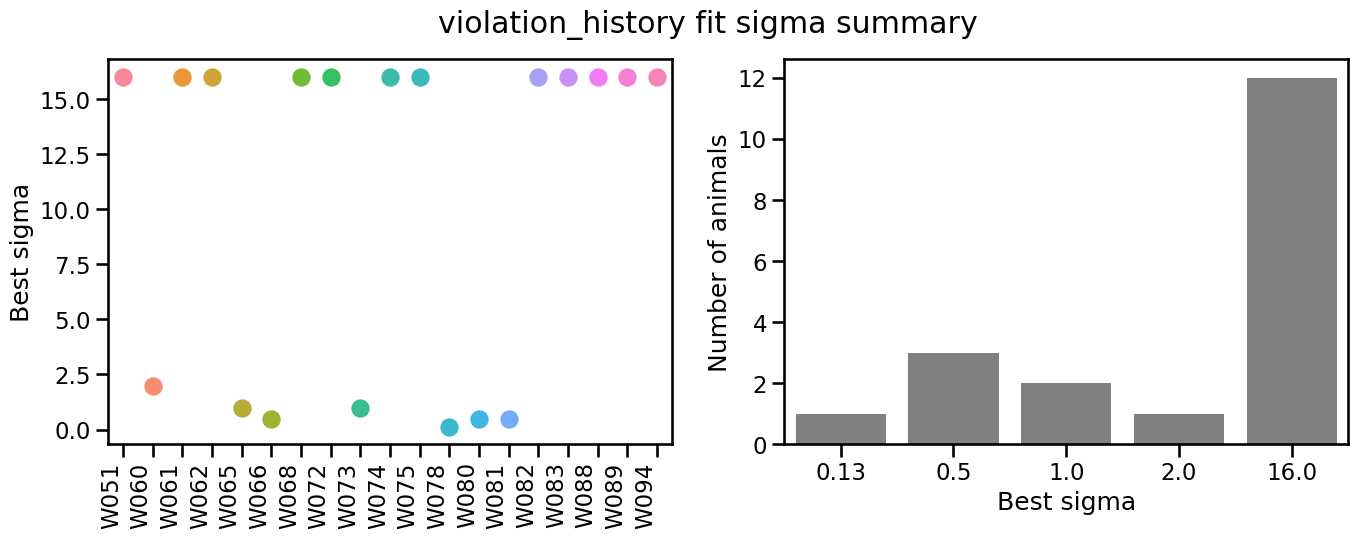

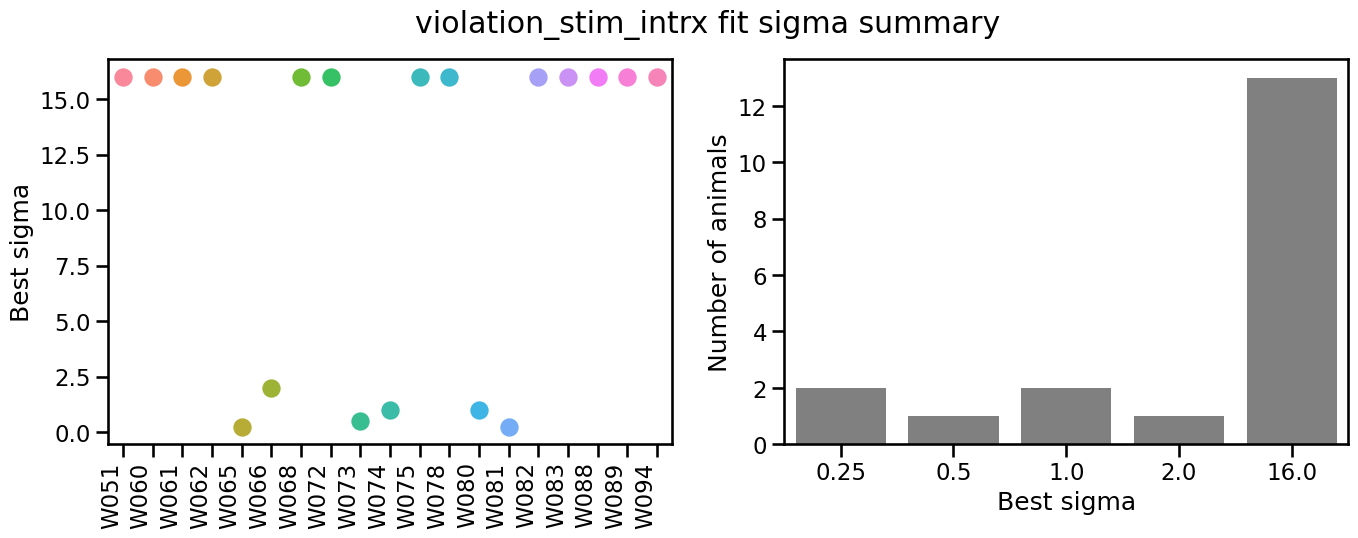

In [5]:
df = mvc.find_best_fit(group="model_name")
for model_name, model_df in df.groupby("model_name"):
    mvc.plot_sigma_summary(model_df, title=f"{model_name} fit sigma summary")

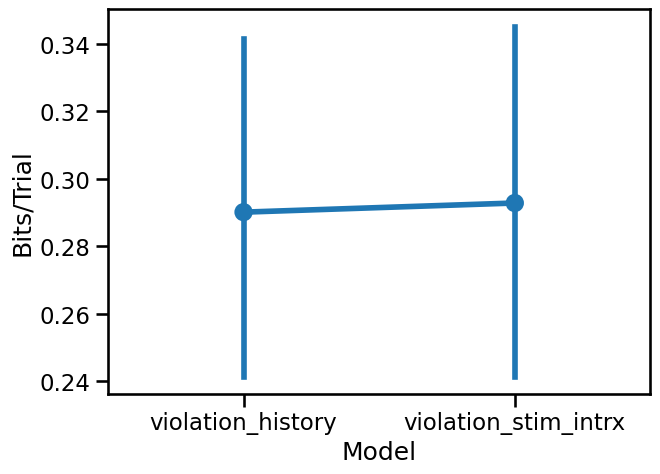

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
mvc.plot_model_comparison(hue=None, ax=ax)

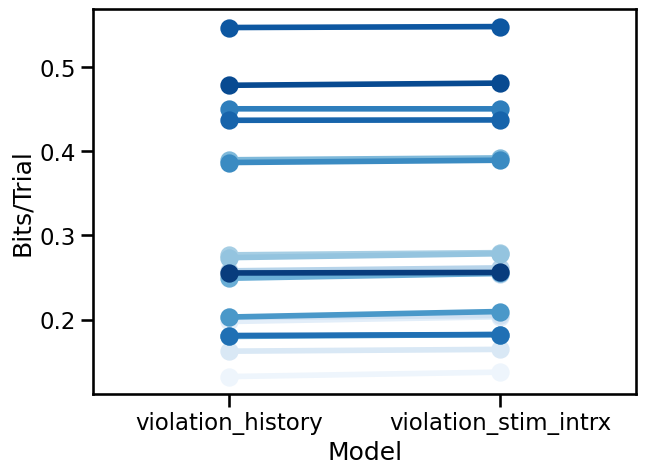

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
mvc.plot_model_comparison(hue="animal_id", palette="Blues", ax=ax)